In [59]:
# Python standard library
import sys
import csv
import os
import copy
# Scientific computing

import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import pandas as pd
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import resample

#plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

PORE_STATS_BASE_DIRECTORY = os.getcwd().replace('notebooks', 'repo')
sys.path.append(PORE_STATS_BASE_DIRECTORY)

import optical_imaging as oi
import oi_file
import image_processing

import itertools

# Jupyter
from IPython.display import HTML
%matplotlib inline

In [93]:
calculations_base_path = 'D:/analysis/2017/'
num_files = 2
dates = ['11-11-2017','11-10-2017']
particles = ['293-T_0','HCT-116_0']
channels = ['10_20_10_1']*num_files

indices = ['0']*num_files

calculations_file_paths = [calculations_base_path + dates[i] + '\\' + particles[i] + '\\' + 
                           channels[i] +'\\'+ indices[i] +'\\' + 'calculations' for i in range(num_files)]


In [94]:
calculations_file_paths

['D:/analysis/2017/11-11-2017\\293-T_0\\10_20_10_1\\0\\calculations',
 'D:/analysis/2017/11-10-2017\\HCT-116_0\\10_20_10_1\\0\\calculations']

In [95]:
data = []

for j in range(num_files):
    
    rows_list = []
    row = 0
    file_1 = pd.read_table(calculations_file_paths[j],delimiter=',')
    header = file_1.columns.values[1:]
    num_events = np.max(file_1['event_num'])
    cell_type = np.full(num_events,j).astype(int)
    
    for i in range(num_events):
        row = file_1[file_1['event_num'] == i].as_matrix(columns = header).transpose().tolist()
        rows_list.append(row)
        
    df = pd.DataFrame(rows_list,columns=header)
    
    for i in header:
        df[i] = df[i].apply(np.array)
    
    df['cell'] = cell_type
    df = df.assign(avg_r_um = np.nan, out_def1 = np.nan, out_def2 = np.nan, 
         nar_def1 = np.nan, nar_def2 = np.nan, cav_def = np.nan,I_std_out=np.nan,I_std_nar1=np.nan,
                   I_std_cav=np.nan,I_std_nar2=np.nan)
    data.append(df)
    
df_copy = copy.deepcopy(data)    

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full(151, 1) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [96]:
frame = pd.DataFrame()

for j in range(num_files):
    
    num_events = len(df_copy[j]['xc_um'])
    
    for i in range(num_events):
        #print(i)
        r_idx = df_copy[j]['xc_um'].iloc[i]<-10
        out1_idx = df_copy[j]['xc_um'].iloc[i]<-5
        out2_idx = df_copy[j]['xc_um'].iloc[i]>155
        nar1_idx = (df_copy[j]['xc_um'].iloc[i]>5) & (df_copy[j]['xc_um'].iloc[i]<45)
        nar2_idx = (df_copy[j]['xc_um'].iloc[i]>105) & (df_copy[j]['xc_um'].iloc[i]<145)
        cav_idx = (df_copy[j]['xc_um'].iloc[i]>45) & (df_copy[j]['xc_um'].iloc[i]<95)
       
#         I_std_out = np.nanmean(df_copy[j]['I_std'].iloc[i][r_idx])
#         I_std_nar1 = np.nanmean(df_copy[j]['I_std'].iloc[i][nar1_idx])
#         I_std_nar2 = np.nanmean(df_copy[j]['I_std'].iloc[i][nar2_idx])
#         I_std_cav = np.nanmean(df_copy[j]['I_std'].iloc[i][cav_idx])
       
        avg_r_um = np.nanmean(df_copy[j]['r_um'].iloc[i][r_idx])
        out1 = np.nanmean(df_copy[j]['aspect-ratio'].iloc[i][out1_idx])
        out2 = np.nanmean(df_copy[j]['aspect-ratio'].iloc[i][out2_idx])
        nar1 = np.nanmean(df_copy[j]['aspect-ratio'].iloc[i][nar1_idx])
        nar2 = np.nanmean(df_copy[j]['aspect-ratio'].iloc[i][nar2_idx])
        cav  = np.nanmean(df_copy[j]['aspect-ratio'].iloc[i][cav_idx])
        
        
        df_copy[j].at[i,'avg_r_um'] = avg_r_um
        df_copy[j].at[i,'out_def1'] = out1
        df_copy[j].at[i,'out_def2'] = out2
        df_copy[j].at[i,'nar_def1'] = nar1
        df_copy[j].at[i,'nar_def2'] = nar2
        df_copy[j].at[i,'cav_def'] = cav
#         df_copy[j].at[i,'I_std_out'] = I_std_out
#         df_copy[j].at[i,'I_std_nar1'] = I_std_nar1
#         df_copy[j].at[i,'I_std_nar2'] = I_std_nar2
#         df_copy[j].at[i,'I_std_cav'] = I_std_cav
    frame = pd.concat([frame,df_copy[j]])
df_total = frame

In [101]:
idx = df_total['cell']==0
x_T = df_total['xc_um'][idx]
d_T= df_total['aspect-ratio'][idx]
num = len(x_T)

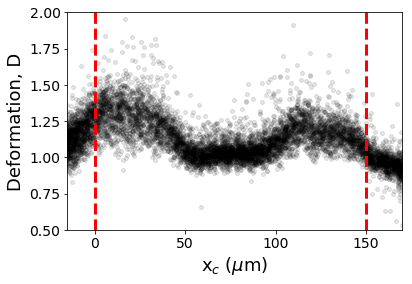

In [102]:
#sns.reset_orig()
axis_size = 18

for i in range(num):
    x = x_T.iloc[i]
    y = d_T.iloc[i]
    plt.scatter(x, y,color = 'black',alpha=.1,s=16)
    
xposition = [0,150]
for xc in xposition:
    plt.axvline(x=xc, color='red', linestyle='--',lw=3)
    
plt.xlabel('x$_{c}$ ($\mu$m)',size=axis_size)
plt.ylabel('Deformation, D',size=axis_size)
#plt.title('0.1 mL/min' ,size =20)
plt.tick_params(labelsize=14)
plt.xlim((-15,170))
plt.ylim((0.5,2))

ax = plt.gca()
ax.set_facecolor('white')

#plt.tight_layout()
plt.title('',size=axis_size)
#plt.savefig('./bps2020/neu_def.png',bbox_inches='tight')
plt.show()

In [106]:
features = ['cell','avg_r_um','cav_def','nar_def1','nar_def2','out_def1','out_def2']

In [107]:
x_cell = df_total[features].copy().dropna(0,'any')
y_cell = df_total[['cell']].copy().as_matrix(columns=None).flatten()

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [108]:
from sklearn.mixture import GaussianMixture

gmm_model = GaussianMixture(n_components=2,n_init=10,random_state=42)

y_gmm = gmm_model.fit_predict(x_cell)

In [109]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(x_cell)
vec = pca.components_

C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 551 but corresponding boolean dimension is 554
  """Entry point for launching an IPython kernel.


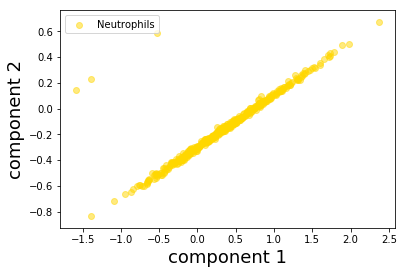

In [111]:
plt.scatter(projected[:, 0][y_cell==0],projected[:,1][y_cell==0],color='gold', alpha=0.5,label='293-T')
#plt.scatter(projected[:, 0][y_cell==1],projected[:,1][y_cell==1],color='navy', alpha=0.5,label ='PMA Activated')
plt.xlabel('component 1',size=axis_size)
plt.ylabel('component 2',size=axis_size)
#plt.title('PCA Neutrophil vs')
plt.legend()
#plt.savefig('./bps2020/pca.png')
plt.show()